# Loan Approval Prediction

### Problem Statement

To check the loan approval status of the applicant.

### Data Definition

**loan_id** : Unique identifier for each loan application.

**no_of_dependents** : Number of dependents the applicant has.

**education** : Education level of the applicant (e.g., Graduate, Not Graduate).

**self_employed** : Employement status of the applicant(e.g., Yes, No).

**income_annum** : Annual income of the  applicant (in monetary units).

**loan_amount** : Requested loan amount (in monetary units).

**loan_term** : Loan repayment term (likely in months or years)

**cibil_score** : Credit score of the applicant.

**residential_assets_value** : Value of applicant's residential property assets.

**commercial_assets_value** : Value of applicant's commercial property assets.

**luxury_assets_value** : Value of applicant's luxury assets (e.g., car,
jewelry).

**bank_asset_value** : Total value of the applicant;s bank accounts/assets.

**loan_status** : Loan approval status

#  Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

#  Set Options

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

#  Read Data

In [4]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

# Understand the Dataset

### Data Type

In [5]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


The field "loan_id is a unique id of each of the loan application. We will drop this field as it will not be used in the analysis.

In [6]:
df.drop("loan_id",axis=1,inplace=True)

In [7]:
df.shape

(4269, 12)

In [8]:
print(df.columns.tolist())

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [9]:
df.columns = df.columns.str.strip()

In [10]:
median_val = df[df['residential_assets_value'] >= 0]['residential_assets_value'].median()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = median_val

In [11]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00
mean,2.50,5059123.92,15133450.46,10.90,599.94,7510658.23,4973155.31,15126305.93,4976692.43
std,1.70,2806839.83,9043362.98,5.71,172.43,6476129.21,4388966.09,9103753.67,3250185.31
min,0.00,200000.00,300000.00,2.00,300.00,0.00,0.00,300000.00,0.00
25%,1.00,2700000.00,7700000.00,6.00,453.00,2200000.00,1300000.00,7500000.00,2300000.00
50%,3.00,5100000.00,14500000.00,10.00,600.00,5700000.00,3700000.00,14600000.00,4600000.00
75%,4.00,7500000.00,21500000.00,16.00,748.00,11300000.00,7600000.00,21700000.00,7100000.00
max,5.00,9900000.00,39500000.00,20.00,900.00,29100000.00,19400000.00,39200000.00,14700000.00


In [12]:
df.describe(include=object)

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


## Distribution of Variables

### 1. Distribution of numeric variables

In [13]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

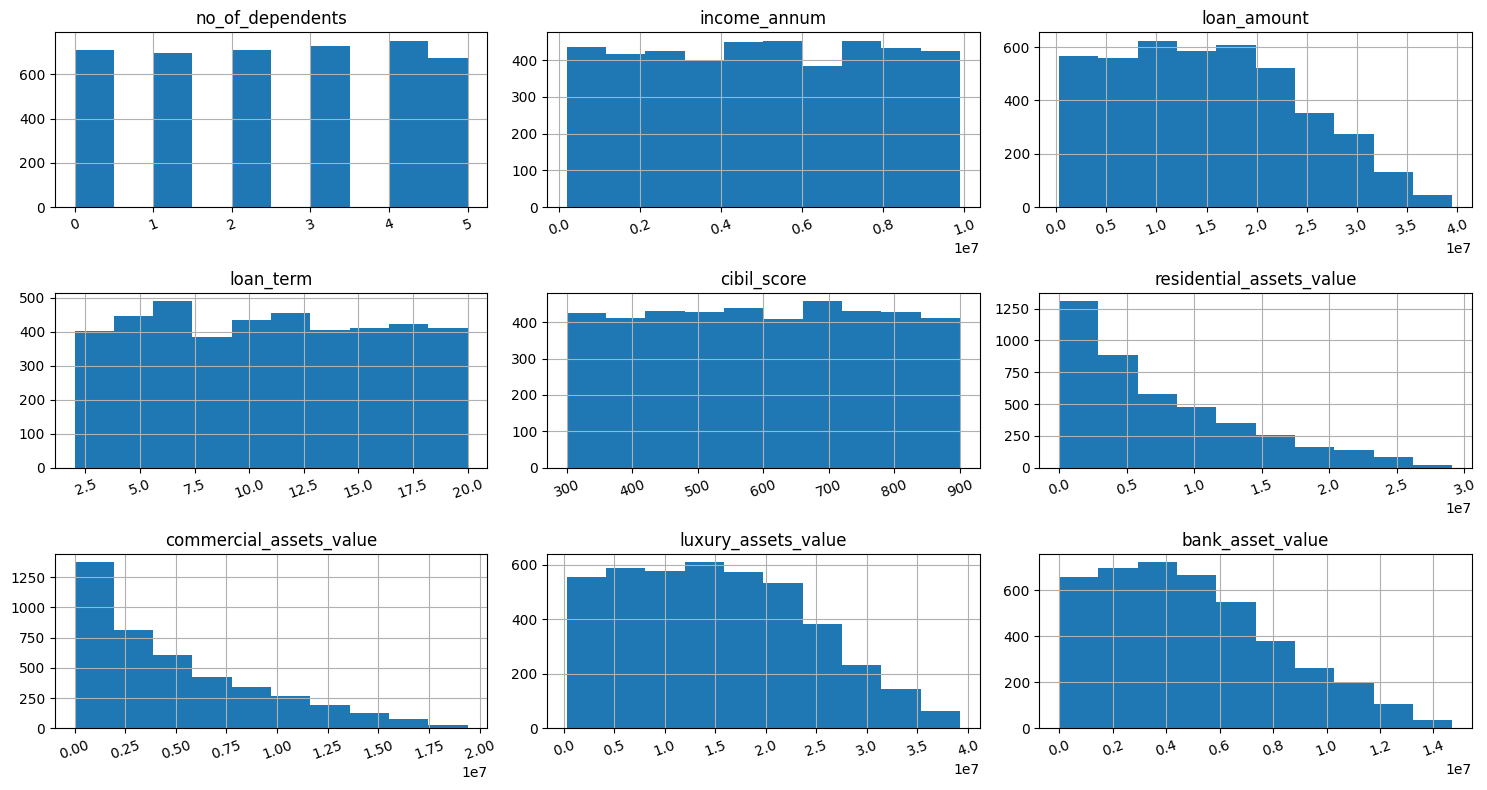

In [14]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
df.hist(xrot=20)
plt.tight_layout()
plt.show()

### 2. Distribution of Categorical variables

In [15]:
df_categorical_features = df.select_dtypes(include=object)
df_categorical_features.columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

['education', 'self_employed', 'loan_status']


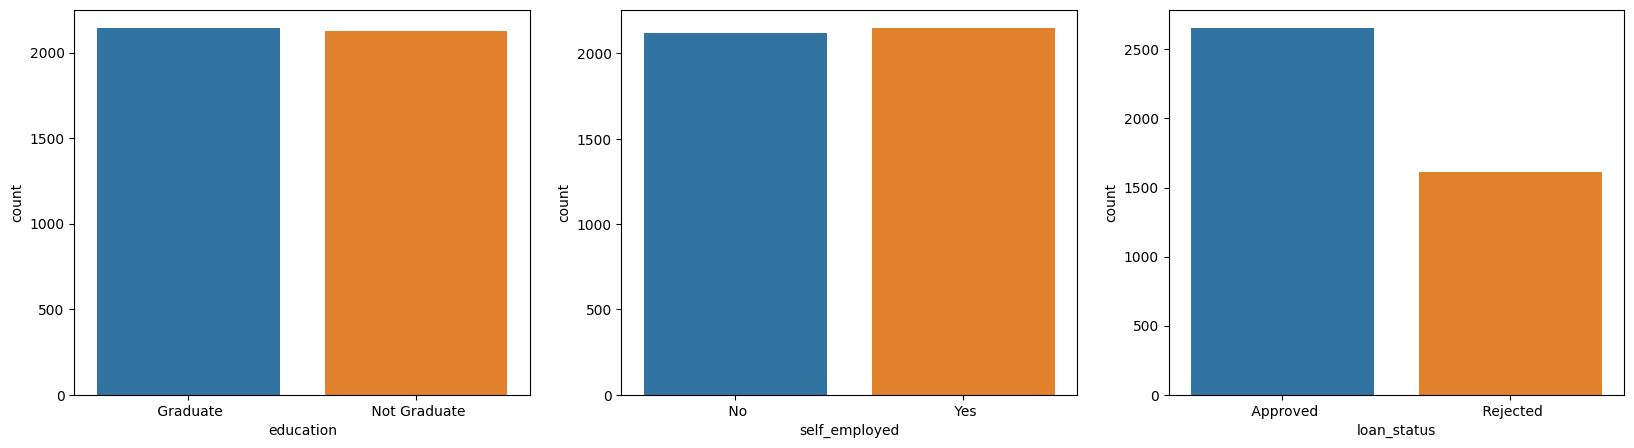

In [16]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
from pandas.api.types import CategoricalDtype

categorical=[]

# use for loop to check the data type of each variable
for column in df:

    # use 'if' statement with condition to check the categorical type
    if df[column].dtypes=='object':

        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):

    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(x=df[variable], ax = subplot,palette="tab10")

print(categorical)

# display the plot
plt.show()

### Distribution of target variables

In [17]:
df["loan_status"].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


### Study of correlation

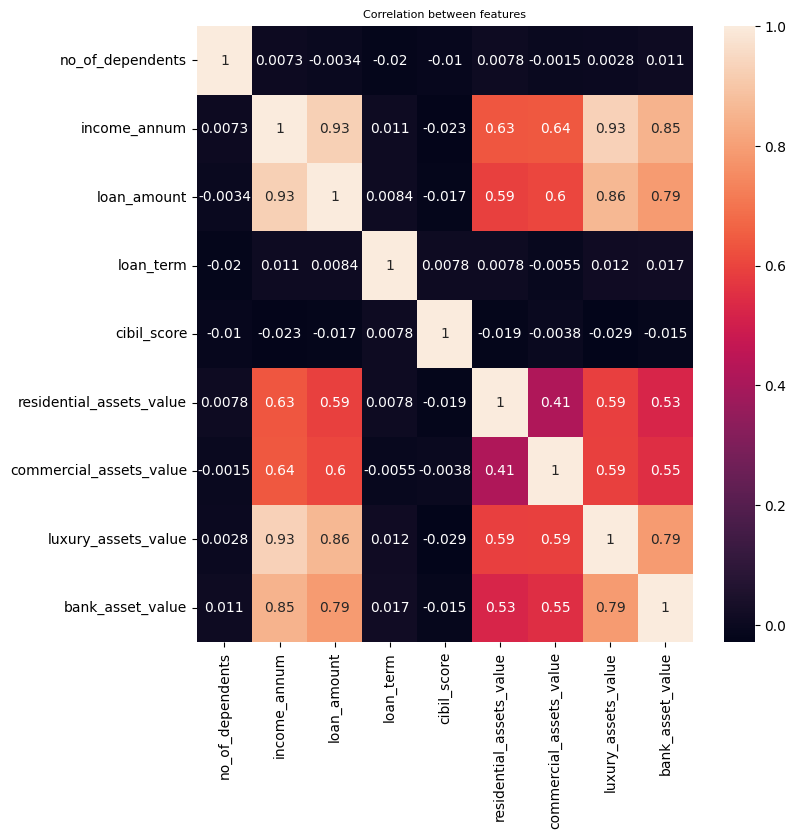

In [19]:
cor=df_numeric_features.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(cor,annot=True)
plt.title('Correlation between features', fontsize=8)
plt.show()

1. Income and Loan Amount are positively correlated with asset values. Higher income and loan amounts tend to be associated with higher residential, commercial, luxury, and bank asset values.
2. Different asset types are positively correlated with each other. Individuals with higher values in one type of asset tend to have higher values in other asset types as well.

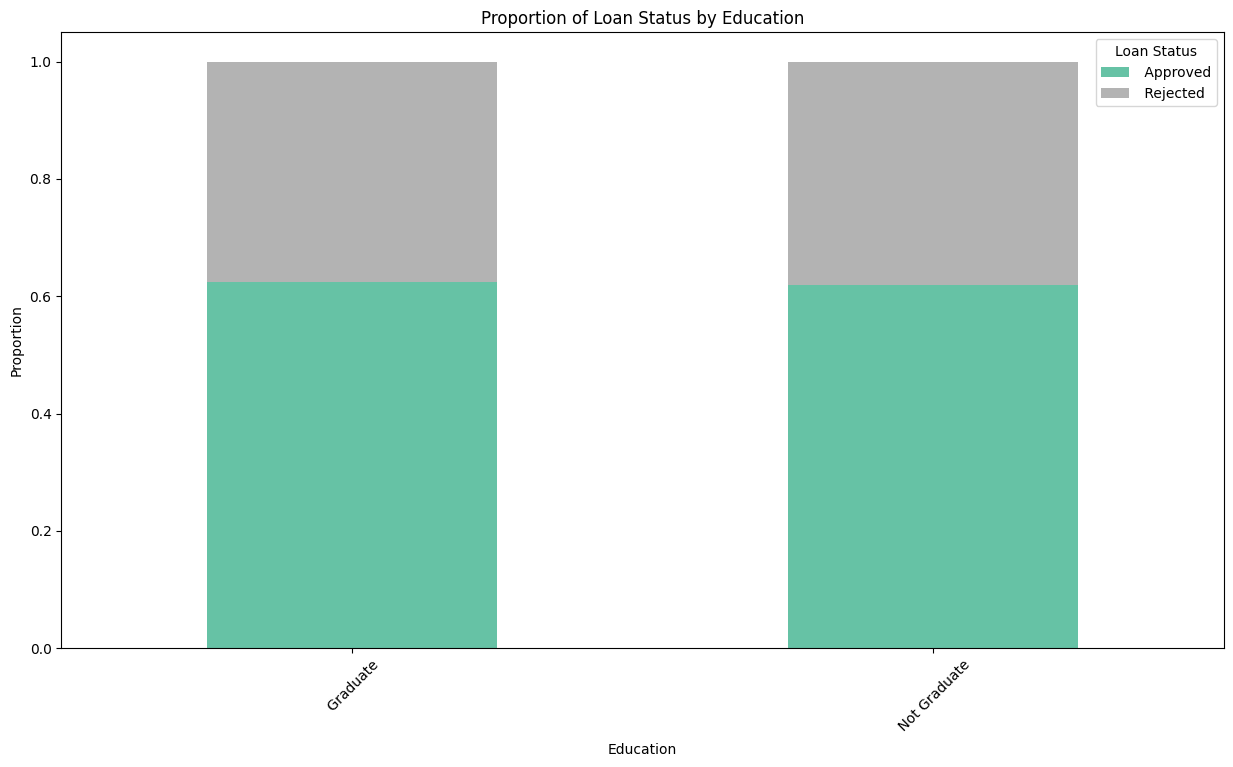

In [20]:
# Create a normalized crosstab (proportions)
crosstab = pd.crosstab(df['education'], df['loan_status'], normalize='index')

# Plot as stacked bar
crosstab.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Loan Status by Education')
plt.ylabel('Proportion')
plt.xlabel('Education')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

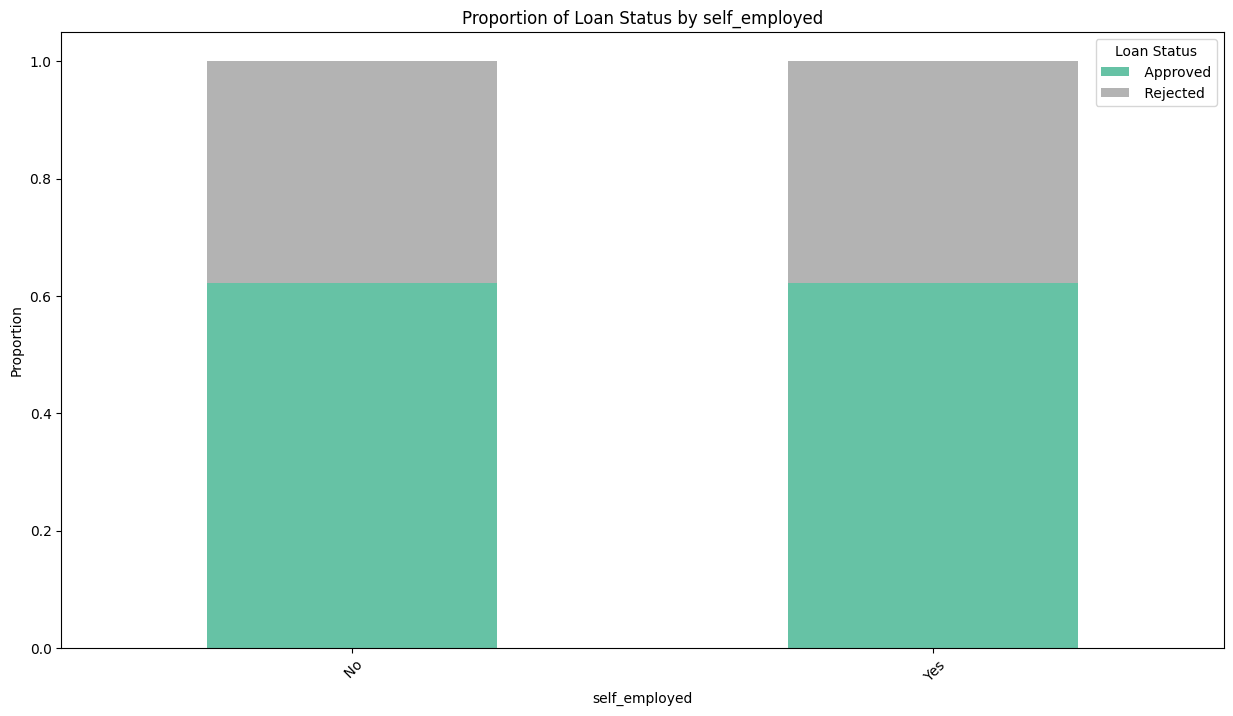

In [21]:
# Create a normalized crosstab (proportions)
crosstab = pd.crosstab(df['self_employed'], df['loan_status'], normalize='index')

# Plot as stacked bar
crosstab.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Loan Status by self_employed')
plt.ylabel('Proportion')
plt.xlabel('self_employed')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

#### Relatioship between Annual Income and Loan status

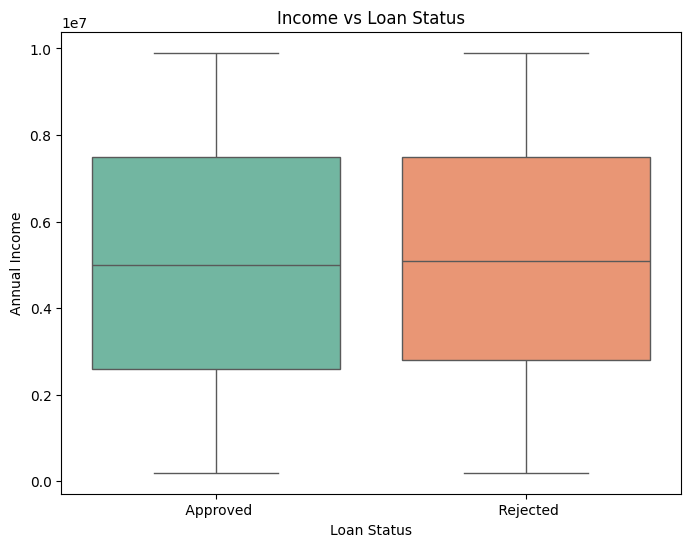

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='loan_status', y='income_annum', hue='loan_status', data=df, palette='Set2', dodge=False)
ax.set_title('Income vs Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Annual Income')

# Safely remove legend if it exists
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.show()


#### Relationship between Cibil Score and Loan Status

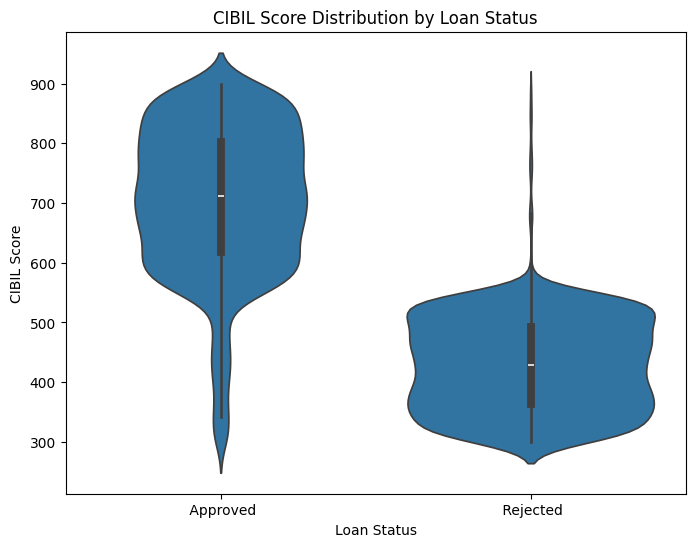

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

The "Approved" violin is generally wider and extends to higher CIBIL scores compared to the "Rejected" violin. This suggests that approved applicants tend to have a broader range of CIBIL scores, including significantly higher values. The "Rejected" violin is narrower and concentrated at lower to mid-range CIBIL scores.The white horizontal line inside each violin represents the median CIBIL score. The median CIBIL score for approved loans is noticeably higher than the median CIBIL score for rejected loans.

#### Relatioship between loan_status and assets_value

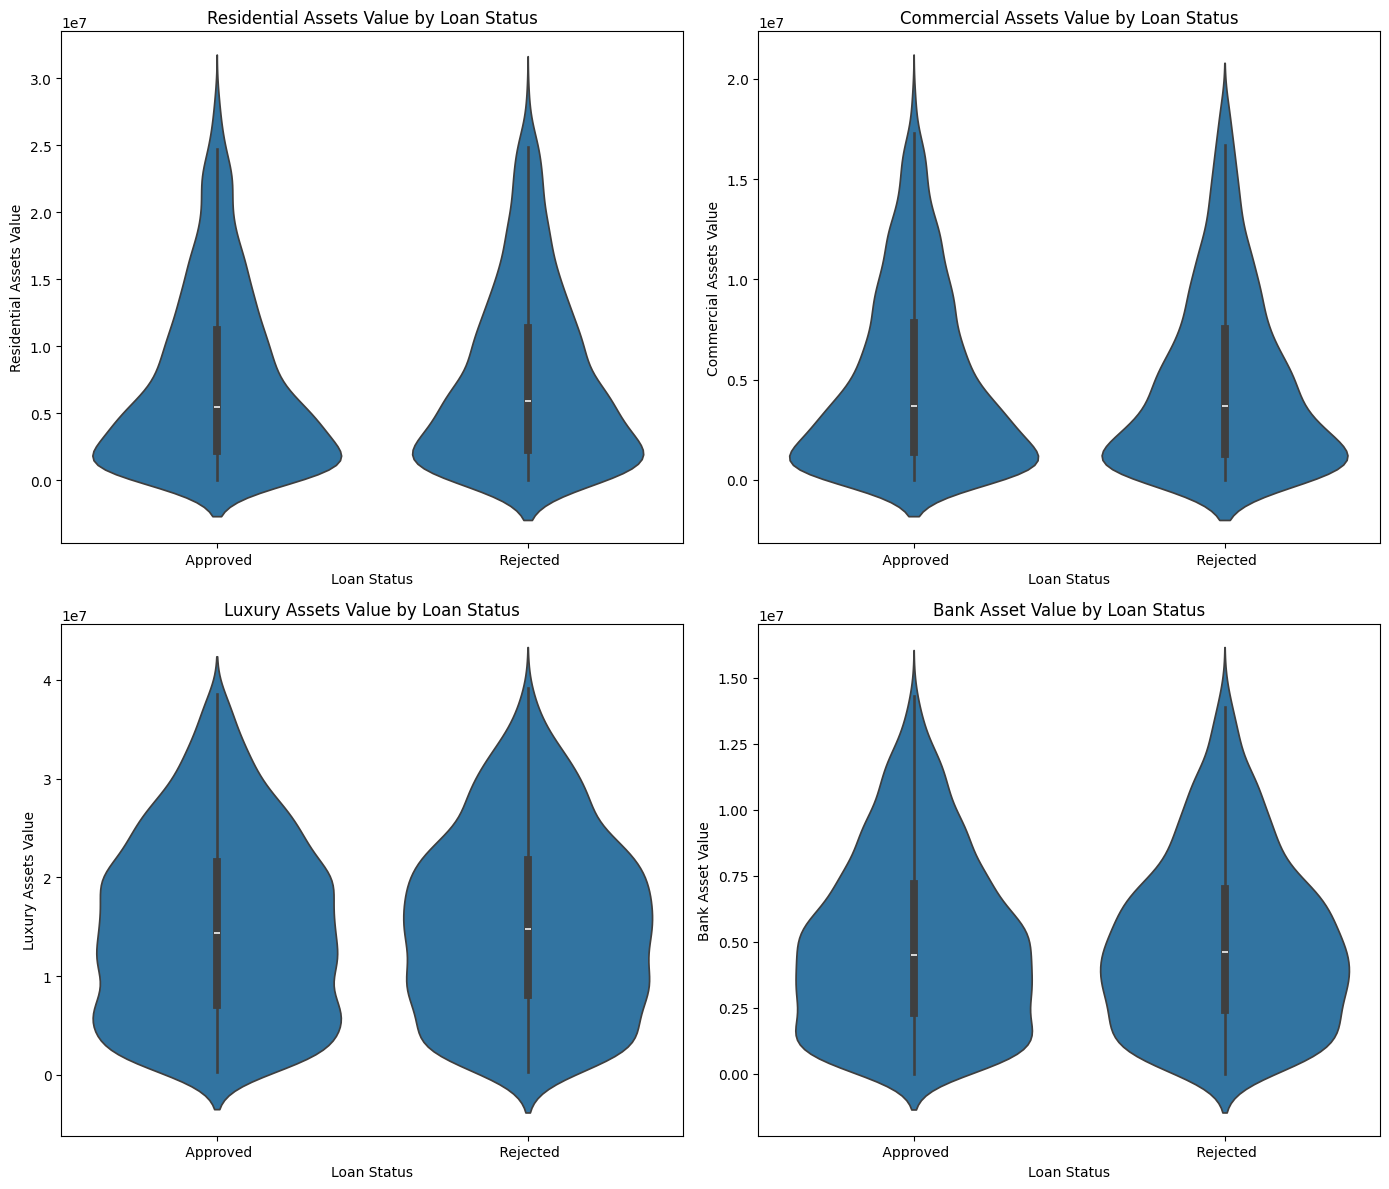

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))

# Residential Assets
plt.subplot(2, 2, 1)
sns.violinplot(x='loan_status', y='residential_assets_value', data=df)
plt.title('Residential Assets Value by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Residential Assets Value')

# Commercial Assets
plt.subplot(2, 2, 2)
sns.violinplot(x='loan_status', y='commercial_assets_value', data=df)
plt.title('Commercial Assets Value by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Commercial Assets Value')

# Luxury Assets
plt.subplot(2, 2, 3)
sns.violinplot(x='loan_status', y='luxury_assets_value', data=df)
plt.title('Luxury Assets Value by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Luxury Assets Value')

# Bank Assets
plt.subplot(2, 2, 4)
sns.violinplot(x='loan_status', y='bank_asset_value', data=df)
plt.title('Bank Asset Value by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Bank Asset Value')

plt.tight_layout()
plt.show()

### Checking Missing values

In [25]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


### Checking for Duplicates

In [26]:
df.duplicated(keep=False)

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


### Checking for Outliers

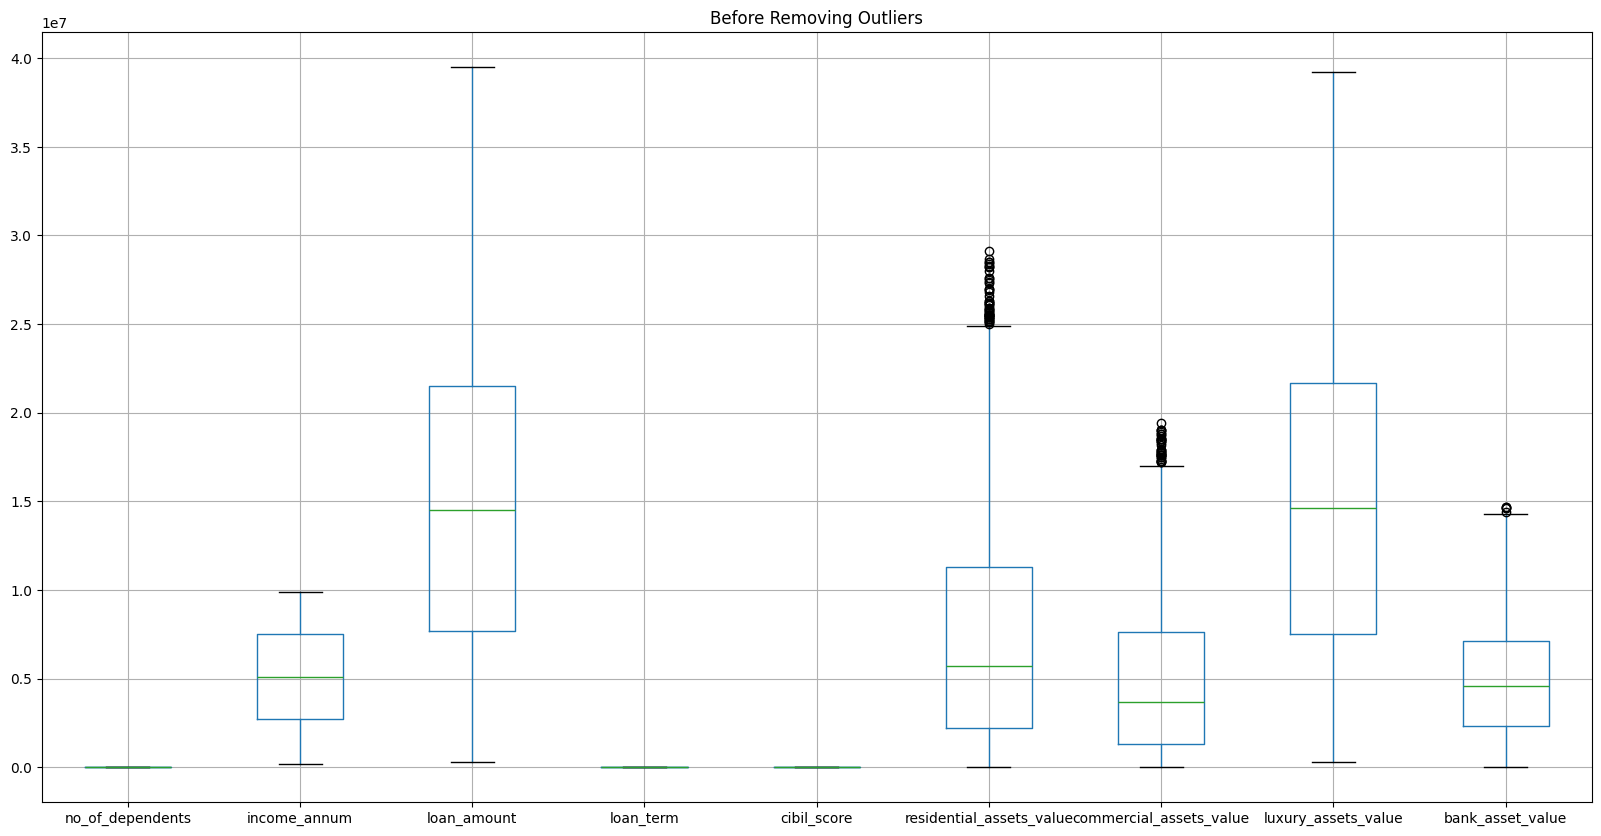

In [27]:
# Selecting numeric columns for outlier detection
# Boxplot before removing outliers
plt.figure(figsize=(20,10))
df_numeric_features.boxplot()
plt.title("Before Removing Outliers")
plt.show()

In [28]:
# Compute IQR for each numeric column
Q1=df_numeric_features.quantile(0.25)
Q3=df_numeric_features.quantile(0.75)
IQR=Q3-Q1
print(IQR)

no_of_dependents                  3.00
income_annum                4800000.00
loan_amount                13800000.00
loan_term                        10.00
cibil_score                     295.00
residential_assets_value    9100000.00
commercial_assets_value     6300000.00
luxury_assets_value        14200000.00
bank_asset_value            4800000.00
dtype: float64


In [29]:
# Define bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
# Remove outliers
df=df[~((df_numeric_features < lower_bound) | (df_numeric_features > upper_bound)).any(axis=1)]
df = df.reset_index(drop = True)

In [30]:
print("Remaining rows:", df.shape[0])
print("Rows removed:", 4269 - df.shape[0])

Remaining rows: 4178
Rows removed: 91


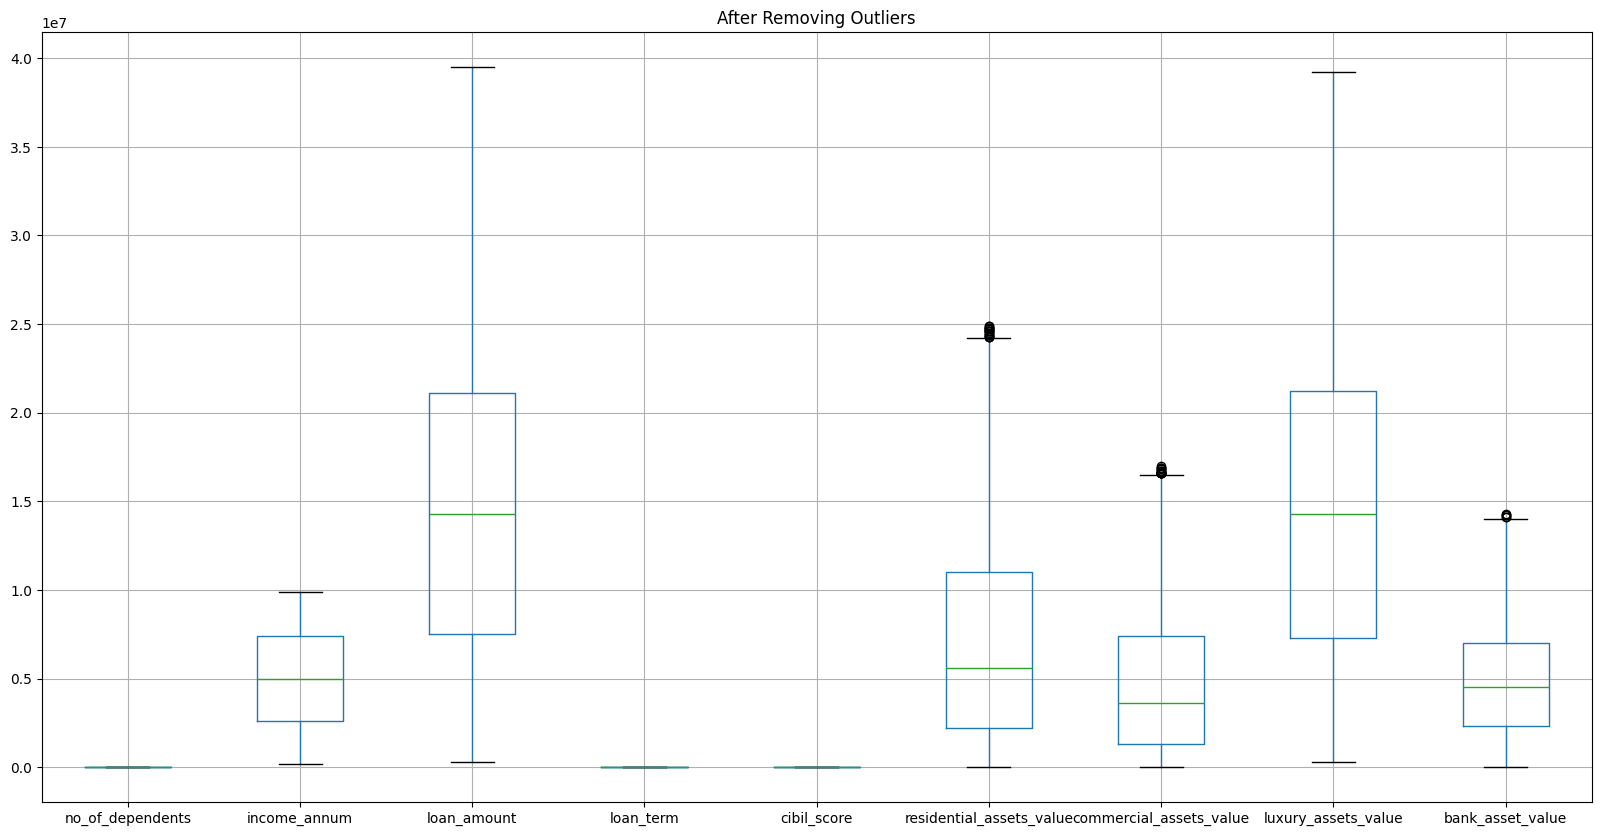

In [31]:
plt.figure(figsize=(20,10))
df.select_dtypes(include=np.number).boxplot()
plt.title("After Removing Outliers")
plt.show()

In [32]:
df_numeric_features = df.select_dtypes(include=np.number)

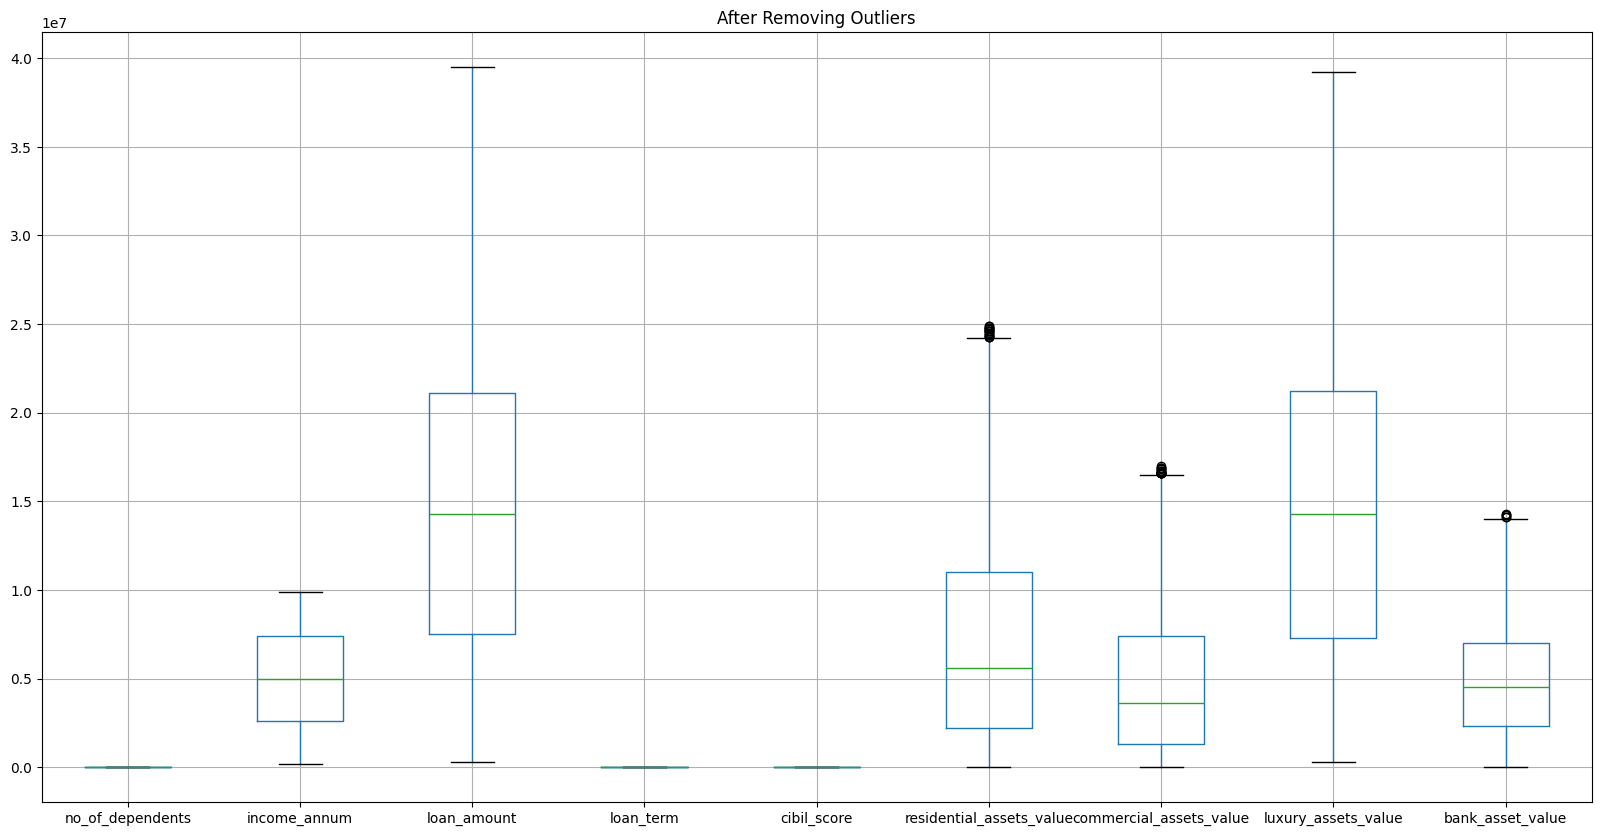

In [33]:
plt.figure(figsize=(20,10))
df_numeric_features.boxplot()
plt.title("After Removing Outliers")
plt.show()

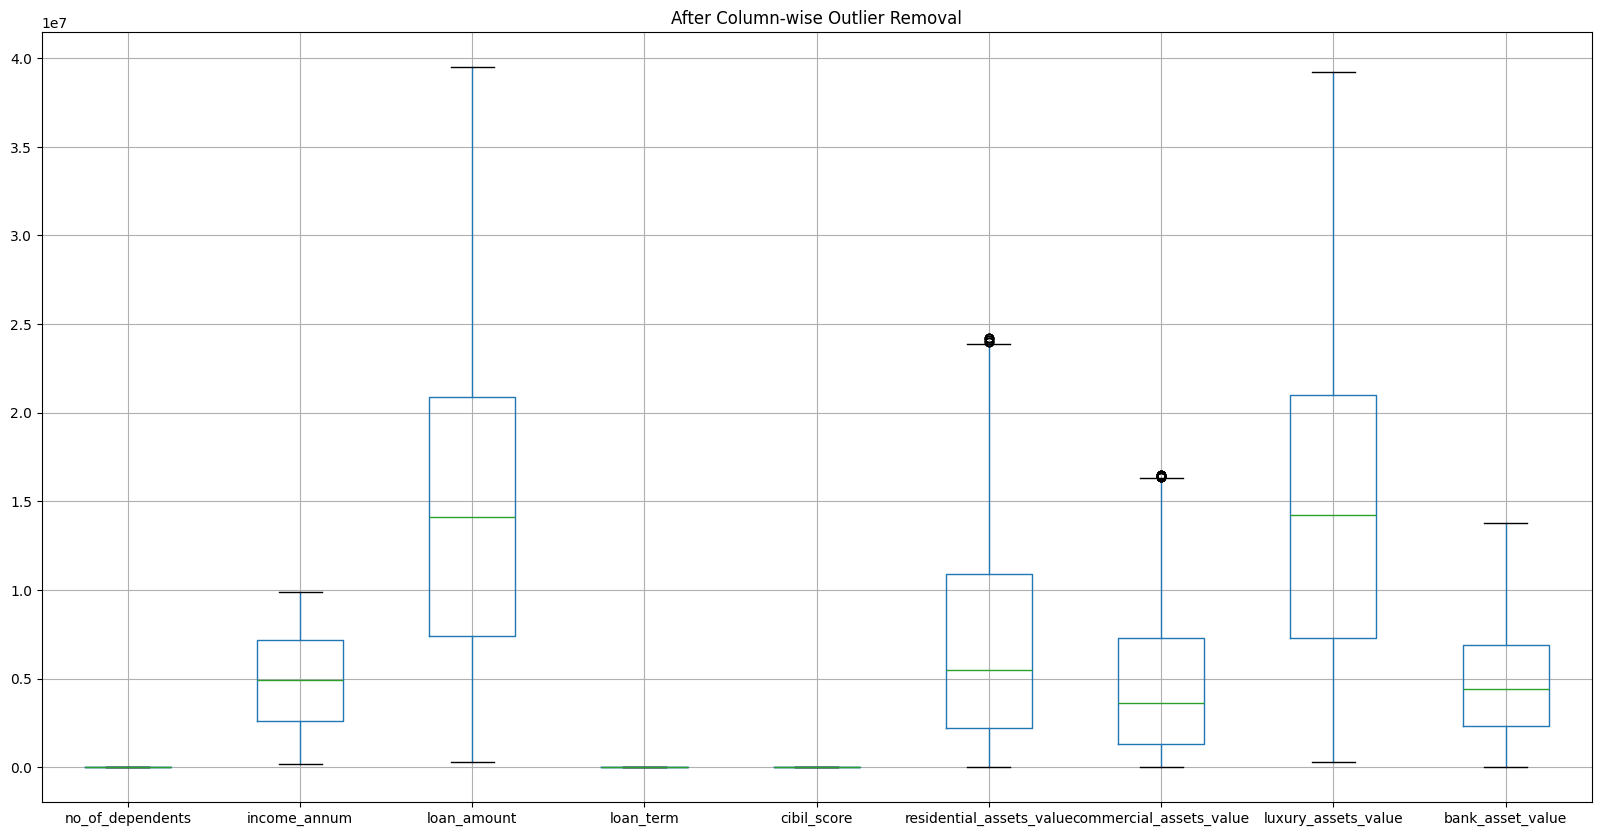

In [34]:
df_cleaned = df.copy()
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
# Apply IQR filter column by column
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Re-plot boxplot
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
df_cleaned[numeric_cols].boxplot()
plt.title("After Column-wise Outlier Removal")
plt.show()

In [35]:
df=df_cleaned.copy()

### Check skewness

In [36]:
# Calculate skewness for each numeric column
skewness = df.select_dtypes(include=np.number).skew()

# Print the skewness of each column
print(skewness)

no_of_dependents           -0.02
income_annum                0.01
loan_amount                 0.34
loan_term                   0.04
cibil_score                -0.01
residential_assets_value    0.89
commercial_assets_value     0.89
luxury_assets_value         0.35
bank_asset_value            0.55
dtype: float64


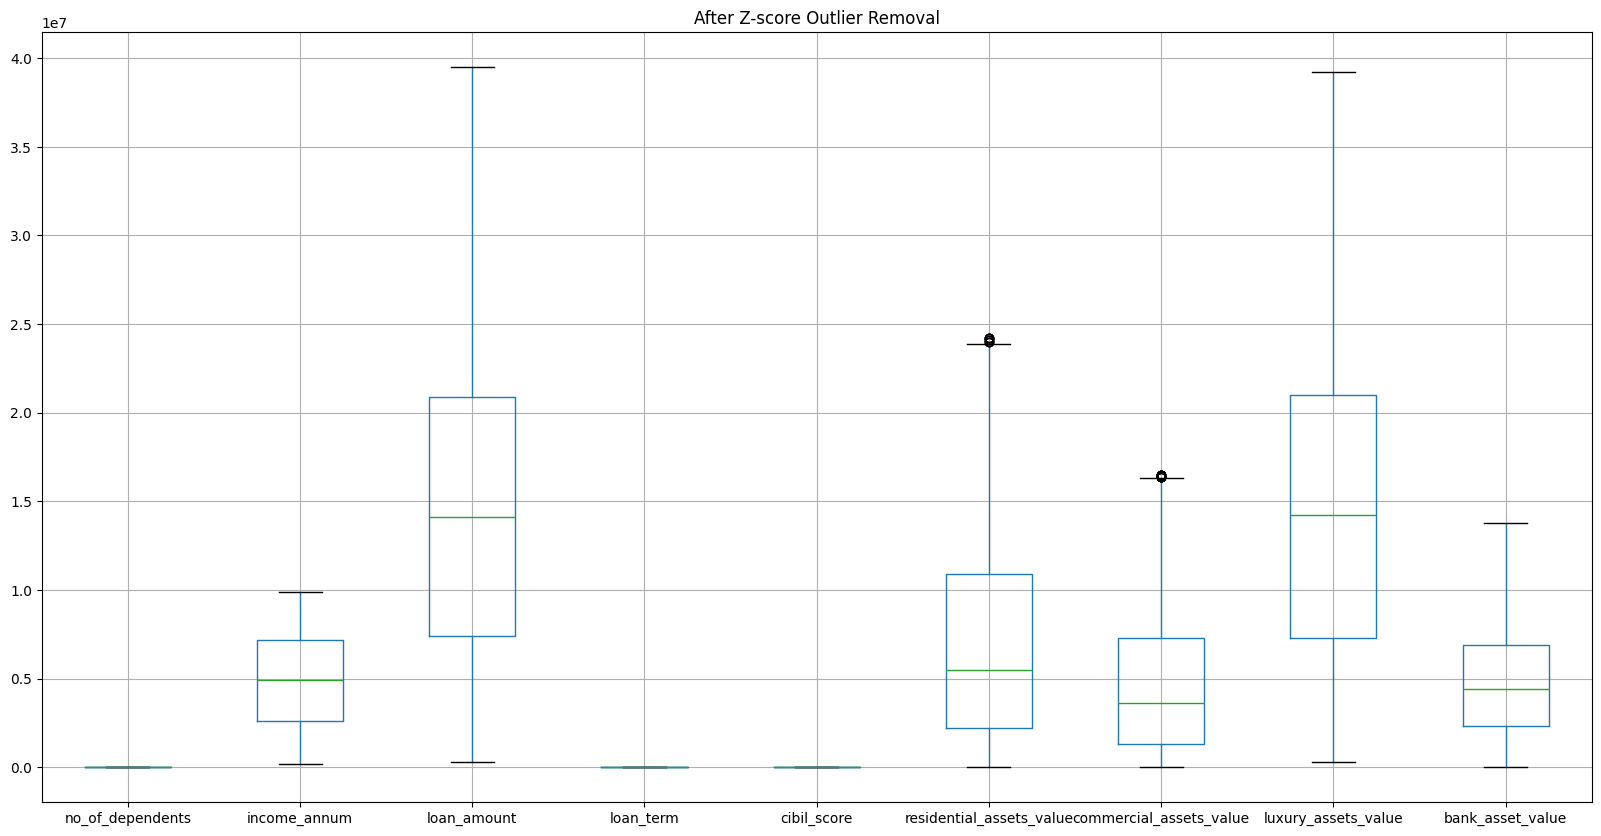

In [37]:
from scipy.stats import zscore
df_numeric_features = df.select_dtypes(include=np.number)  # Keep only numeric columns
z_scores = np.abs(zscore(df_numeric_features))

# Step 3: Filter out rows where any column has a Z-score greater than 3 (common threshold)
df_cleaned_zscore = df[(z_scores < 3).all(axis=1)]

# Step 4: Reset index after removal
df_cleaned_zscore = df_cleaned_zscore.reset_index(drop=True)

# Step 5: Re-check with a boxplot to confirm removal
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_cleaned_zscore.select_dtypes(include=np.number).boxplot()
plt.title("After Z-score Outlier Removal")
plt.show()

In [38]:
df=df_cleaned_zscore


### Encoding Categorical Variables

In [39]:
df_categorical_features.columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["education"]=le.fit_transform(df["education"])

In [41]:
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [42]:
df=pd.get_dummies(df,columns=["self_employed"],drop_first=True)

In [43]:
df.head()

,no_of_dependents,education,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,self_employed_ Yes
0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,True
1,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,False
2,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,False
3,5,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,True
4,0,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,True


In [44]:
df['self_employed_ Yes'] = df['self_employed_ Yes'].astype(int)

In [45]:
df.rename(columns={'self_employed_ Yes': 'self_employed_yes'}, inplace=True)

In [46]:
df.head()

,no_of_dependents,education,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,self_employed_yes
0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
1,3,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
2,3,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
3,5,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1
4,0,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,1


### Standard Scaling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df['loan_status'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})
X = df.drop("loan_status", axis=1)  # Features
y = df["loan_status"]  # Target (loan_status)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling (Only apply to numeric features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Apply SMOTE to the training data to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [49]:
y_train_smote.value_counts()

,count
loan_status,
1,2057
0,2057


# Model Building

#### 1. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Print classification report
print("Logistic Regression Classifier")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       307
           1       0.96      0.92      0.94       520

    accuracy                           0.93       827
   macro avg       0.92      0.93      0.92       827
weighted avg       0.93      0.93      0.93       827



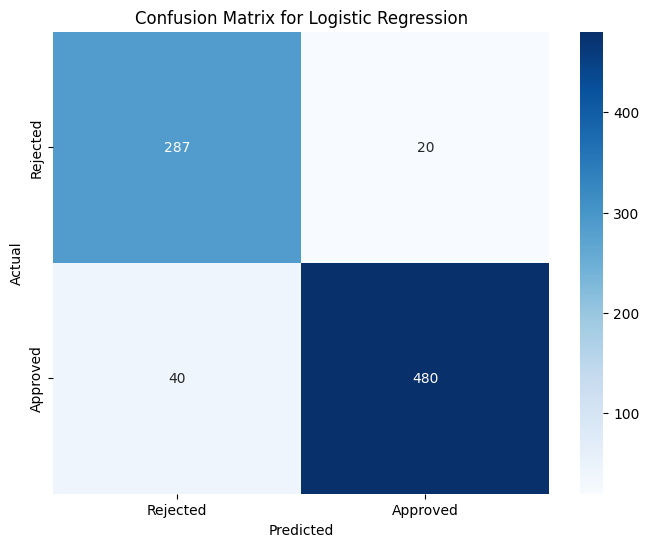

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 2.Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Print classification report
print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       307
           1       0.99      0.98      0.98       520

    accuracy                           0.98       827
   macro avg       0.98      0.98      0.98       827
weighted avg       0.98      0.98      0.98       827



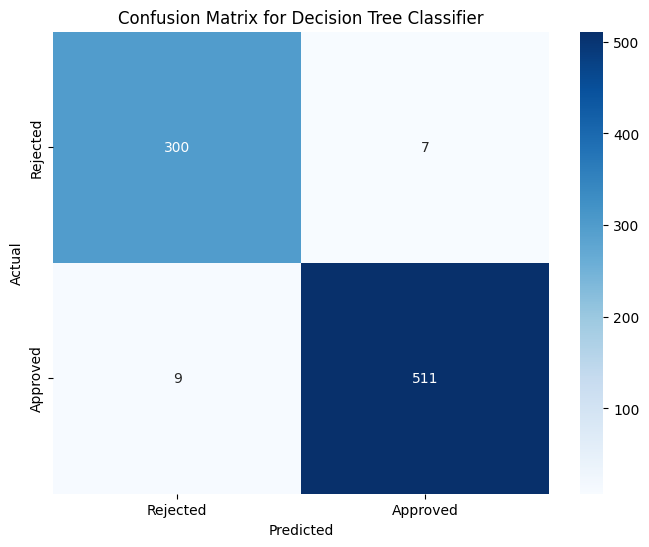

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 4.Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Print classification report
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       307
           1       0.99      0.98      0.99       520

    accuracy                           0.98       827
   macro avg       0.98      0.98      0.98       827
weighted avg       0.98      0.98      0.98       827



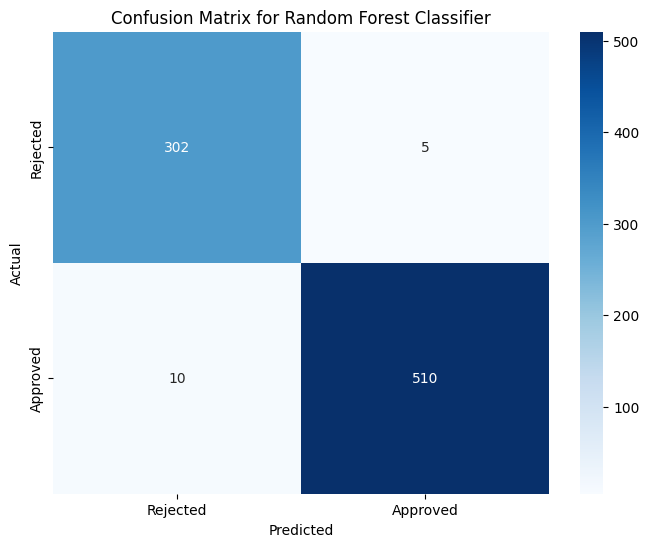

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 4.XGBoost Classifier

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize XGBoost
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Print classification report
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.99      0.99      0.99       520

    accuracy                           0.99       827
   macro avg       0.99      0.99      0.99       827
weighted avg       0.99      0.99      0.99       827



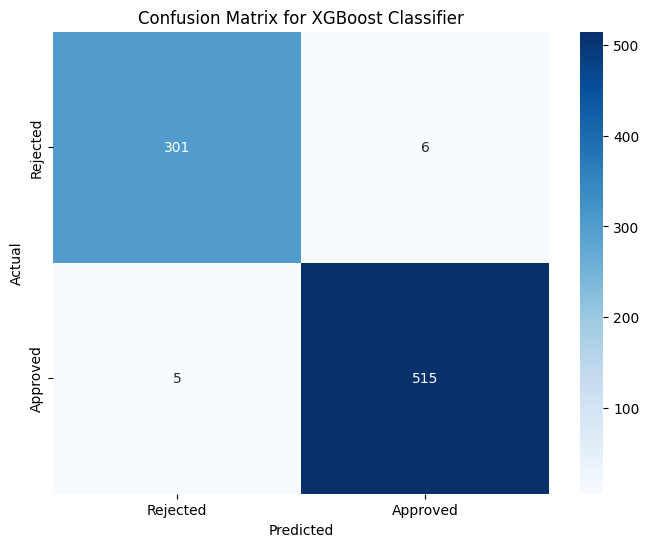

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 5. Stacking Classifier

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Diverse base models
base_learners = [
    ('lr', LogisticRegression(C=1.0, solver='liblinear', random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=8, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                          subsample=0.8, colsample_bytree=0.8,
                          random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Use a strong meta-classifier
meta_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Fit and evaluate
stack_model.fit(X_train_smote, y_train_smote)
y_pred_stack = stack_model.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("Updated Stacking Classifier Results:")
print(classification_report(y_test, y_pred_stack))

Updated Stacking Classifier Results:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       307
           1       0.98      0.99      0.98       520

    accuracy                           0.98       827
   macro avg       0.98      0.98      0.98       827
weighted avg       0.98      0.98      0.98       827



In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Initialize AdaBoost
ada_boost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
ada_boost_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada_boost = ada_boost_classifier.predict(X_test_scaled)

# Print classification report
print("AdaBoost Classifier")
print(classification_report(y_test, y_pred_ada_boost))

AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       307
           1       0.98      0.96      0.97       520

    accuracy                           0.96       827
   macro avg       0.96      0.96      0.96       827
weighted avg       0.96      0.96      0.96       827



In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Train the model
bagging_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test_scaled)

# Print classification report
print("Bagging Classifier")
print(classification_report(y_test, y_pred_bagging))

Bagging Classifier
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       307
           1       0.98      0.97      0.98       520

    accuracy                           0.97       827
   macro avg       0.97      0.97      0.97       827
weighted avg       0.97      0.97      0.97       827



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)

# Define expanded hyperparameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Solvers that support both L1 and L2
    'max_iter': [100, 200, 500],  # Number of iterations
    'class_weight': [None, 'balanced']  # To handle imbalanced classes
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_smote, y_train_smote)

# Best parameters and evaluation
print(f"Best parameters for Logistic Regression after further tuning: {grid_search_lr.best_params_}")
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Logistic Regression after further tuning: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       307
           1       0.98      0.92      0.95       520

    accuracy                           0.94       827
   macro avg       0.93      0.95      0.94       827
weighted avg       0.94      0.94      0.94       827



In [ ]:
# Define a new hyperparameter grid for further tuning
param_grid_dt_2 = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with the updated hyperparameter grid
grid_search_dt_2 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt_2, cv=5, n_jobs=-1, verbose=2)
grid_search_dt_2.fit(X_train_smote, y_train_smote)

# Best parameters and evaluation
print(f"Best parameters for Decision Tree after further tuning: {grid_search_dt_2.best_params_}")
y_pred_dt_2 = grid_search_dt_2.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt_2))

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits
Best parameters for Decision Tree after further tuning: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       307
           1       0.99      0.97      0.98       520

    accuracy                           0.97       827
   macro avg       0.97      0.98      0.97       827
weighted avg       0.98      0.97      0.97       827



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on test set
from sklearn.metrics import classification_report
y_pred_rf = grid_search.predict(X_test_scaled)
print("Classification Report (Random Forest after tuning):")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report (Random Forest after tuning):


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       307
           1       0.99      0.98      0.99       520

    accuracy                           0.98       827
   macro avg       0.98      0.98      0.98       827
weighted avg       0.98      0.98      0.98       827



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Limit number of combinations
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Fit model
random_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters for XGBoost (Randomized Search):", random_search.best_params_)

# Predict and evaluate
y_pred_xgb = random_search.predict(X_test_scaled)
print("Classification Report (XGBoost after tuning):")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for XGBoost (Randomized Search): {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Classification Report (XGBoost after tuning):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.99      0.99      0.99       520

    accuracy                           0.99       827
   macro avg       0.99      0.99      0.99       827
weighted avg       0.99      0.99      0.99       827



In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [72]:
from sklearn.metrics import classification_report, accuracy_score

# Persistent score_card_df to accumulate results across function calls
score_card_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Support', 'Accuracy'])

def results(model_name, model):
    global score_card_df

    # Fit the model and generate predictions
    model.fit(X_train_smote, y_train_smote)
    pred = model.predict(X_test_scaled)

    # Generate the classification report and accuracy
    report = classification_report(y_test, pred, output_dict=True)
    accuracy = accuracy_score(y_test, pred)

    # Map class labels to 'Approved' and 'Not Approved'
    class_mapping = {'0': 'Not Approved', '1': 'Approved'}

    # Collect metrics for each class
    for class_label in report.keys():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
            class_name = class_mapping.get(class_label, class_label)

            # Append results using .loc[]
            index = len(score_card_df)
            score_card_df.loc[index] = {
                'Model': f"{model_name} - Class {class_name}",
                'Precision': report[class_label]['precision'],
                'Recall': report[class_label]['recall'],
                'F1 Score': report[class_label]['f1-score'],
                'Support': report[class_label]['support'],
                'Accuracy': accuracy
            }


    return score_card_df

In [73]:
results("LogisticRegression",log_reg)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93


In [74]:
results("Decision Tree Classifier",dt_classifier)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93
2,Decision Tree Classifier - Class Not Approved,0.97,0.98,0.97,307.00,0.98
3,Decision Tree Classifier - Class Approved,0.99,0.98,0.98,520.00,0.98


In [75]:
results("Random Forest Classifier",rf_classifier)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93
2,Decision Tree Classifier - Class Not Approved,0.97,0.98,0.97,307.00,0.98
3,Decision Tree Classifier - Class Approved,0.99,0.98,0.98,520.00,0.98
4,Random Forest Classifier - Class Not Approved,0.97,0.98,0.98,307.00,0.98
5,Random Forest Classifier - Class Approved,0.99,0.98,0.99,520.00,0.98


In [76]:
results("Bagging Classifier",bagging_classifier)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93
2,Decision Tree Classifier - Class Not Approved,0.97,0.98,0.97,307.00,0.98
3,Decision Tree Classifier - Class Approved,0.99,0.98,0.98,520.00,0.98
4,Random Forest Classifier - Class Not Approved,0.97,0.98,0.98,307.00,0.98
5,Random Forest Classifier - Class Approved,0.99,0.98,0.99,520.00,0.98
6,Bagging Classifier - Class Not Approved,0.95,0.97,0.96,307.00,0.97
7,Bagging Classifier - Class Approved,0.98,0.97,0.98,520.00,0.97


In [77]:
results("AdaBoost Classifier",ada_boost_classifier)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93
2,Decision Tree Classifier - Class Not Approved,0.97,0.98,0.97,307.00,0.98
3,Decision Tree Classifier - Class Approved,0.99,0.98,0.98,520.00,0.98
4,Random Forest Classifier - Class Not Approved,0.97,0.98,0.98,307.00,0.98
5,Random Forest Classifier - Class Approved,0.99,0.98,0.99,520.00,0.98
6,Bagging Classifier - Class Not Approved,0.95,0.97,0.96,307.00,0.97
7,Bagging Classifier - Class Approved,0.98,0.97,0.98,520.00,0.97
8,AdaBoost Classifier - Class Not Approved,0.93,0.97,0.95,307.00,0.96
9,AdaBoost Classifier - Class Approved,0.98,0.96,0.97,520.00,0.96


In [78]:
results("XGBoost Classifier",xgb_classifier)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93
2,Decision Tree Classifier - Class Not Approved,0.97,0.98,0.97,307.00,0.98
3,Decision Tree Classifier - Class Approved,0.99,0.98,0.98,520.00,0.98
4,Random Forest Classifier - Class Not Approved,0.97,0.98,0.98,307.00,0.98
5,Random Forest Classifier - Class Approved,0.99,0.98,0.99,520.00,0.98
6,Bagging Classifier - Class Not Approved,0.95,0.97,0.96,307.00,0.97
7,Bagging Classifier - Class Approved,0.98,0.97,0.98,520.00,0.97
8,AdaBoost Classifier - Class Not Approved,0.93,0.97,0.95,307.00,0.96
9,AdaBoost Classifier - Class Approved,0.98,0.96,0.97,520.00,0.96


In [79]:
results("Stacking Classifier",stack_model)

,Model,Precision,Recall,F1 Score,Support,Accuracy
0,LogisticRegression - Class Not Approved,0.88,0.93,0.91,307.00,0.93
1,LogisticRegression - Class Approved,0.96,0.92,0.94,520.00,0.93
2,Decision Tree Classifier - Class Not Approved,0.97,0.98,0.97,307.00,0.98
3,Decision Tree Classifier - Class Approved,0.99,0.98,0.98,520.00,0.98
4,Random Forest Classifier - Class Not Approved,0.97,0.98,0.98,307.00,0.98
5,Random Forest Classifier - Class Approved,0.99,0.98,0.99,520.00,0.98
6,Bagging Classifier - Class Not Approved,0.95,0.97,0.96,307.00,0.97
7,Bagging Classifier - Class Approved,0.98,0.97,0.98,520.00,0.97
8,AdaBoost Classifier - Class Not Approved,0.93,0.97,0.95,307.00,0.96
9,AdaBoost Classifier - Class Approved,0.98,0.96,0.97,520.00,0.96
